In [1]:
import pandas as pd

# -----------------------------
# Step 1: Load the training data
# -----------------------------
df = pd.read_csv("ml1.csv")
print("Training Data:\n")
print(df)

# Convert to list of records
data = df.values.tolist()

# Identify the target column (last column)
target_index = len(df.columns) - 1

# --------------------------------------------------
# Step 2: Initialize the most specific hypothesis S
# --------------------------------------------------
# Start with the most specific hypothesis: ["Ø", "Ø", ..., "Ø"]
num_attributes = target_index
hypothesis = ["Ø"] * num_attributes

print("\nInitial Hypothesis:", hypothesis)

# --------------------------------------------------
# Step 3: Apply FIND-S Algorithm
# --------------------------------------------------
for row in data:
    if row[target_index] == "Yes":     # Only consider positive examples
        for i in range(num_attributes):
            if hypothesis[i] == "Ø":
                hypothesis[i] = row[i]
            elif hypothesis[i] != row[i]:
                hypothesis[i] = "?"
                
print("\nFinal Hypothesis after applying FIND-S:\n")
print(hypothesis)


Training Data:

     Sky AirTemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Warm   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes
4  Sunny    Cold   Normal    Weak  Warm     Same         No
5  Rainy    Warm   Normal  Strong  Warm     Same        Yes

Initial Hypothesis: ['Ø', 'Ø', 'Ø', 'Ø', 'Ø', 'Ø']

Final Hypothesis after applying FIND-S:

['?', 'Warm', '?', 'Strong', '?', '?']


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("ml1.csv")
data = df.values.tolist()

# Initialize S and G
S = ['Ø'] * (len(df.columns) - 1)
G = [['?' for _ in range(len(S))]]

print("Initial S:", S)
print("Initial G:", G)

# Algorithm
for row in data:
    x, y = row[:-1], row[-1]

    # Positive Example
    if y == "Yes":
        for i in range(len(S)):
            if S[i] == "Ø":
                S[i] = x[i]
            elif S[i] != x[i]:
                S[i] = "?"
        # Remove inconsistent values from G
        G = [g for g in G if all(g[i] == x[i] or g[i] == "?" for i in range(len(S)))]

    # Negative Example
    else:
        newG = []
        for g in G:
            if all(g[i] == x[i] or g[i] == "?" for i in range(len(S))):
                for i in range(len(S)):
                    if g[i] == "?" and S[i] != x[i]:
                        h = g.copy()
                        h[i] = S[i]
                        newG.append(h)
            else:
                newG.append(g)
        G = newG

# Remove duplicate hypotheses in G
unique_G = []
for g in G:
    if g not in unique_G:
        unique_G.append(g)
G = unique_G

# Display final S and G
print("\nFinal Specific Boundary S:", S)
print("Final General Boundary G:", G)


Initial S: ['Ø', 'Ø', 'Ø', 'Ø', 'Ø', 'Ø']
Initial G: [['?', '?', '?', '?', '?', '?']]

Final Specific Boundary S: ['?', 'Warm', '?', 'Strong', '?', '?']
Final General Boundary G: [['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', 'Strong', '?', '?']]


In [6]:
import pandas as pd
import math

# Load dataset
df = pd.read_csv("ml1.csv")

# Entropy
def entropy(data):
    values = data.unique()
    ent = 0
    for v in values:
        p = (data == v).mean()
        ent -= p * math.log2(p)
    return ent

# Information Gain
def info_gain(df, attr, target):
    total = entropy(df[target])
    vals = df[attr].unique()
    w_ent = 0
    for v in vals:
        subset = df[df[attr] == v]
        w_ent += (len(subset)/len(df)) * entropy(subset[target])
    return total - w_ent

# ID3 Algorithm
def id3(df, target, attributes):
    # All examples same class
    if len(df[target].unique()) == 1:
        return df[target].iloc[0]

    # No attributes left
    if not attributes:
        return df[target].mode()[0]

    # Choose best attribute
    gains = {a: info_gain(df, a, target) for a in attributes}
    best = max(gains, key=gains.get)
    tree = {best: {}}

    # Branch for each value
    for v in df[best].unique():
        subset = df[df[best] == v]
        if subset.empty:
            tree[best][v] = df[target].mode()[0]
        else:
            rem = [a for a in attributes if a != best]
            tree[best][v] = id3(subset, target, rem)

    return tree

# Build tree
attributes = list(df.columns[:-1])
tree = id3(df, "EnjoySport", attributes)
print("Decision Tree:\n", tree)

# Classification
def classify(tree, sample):
    attr = next(iter(tree))
    value = sample[attr]
    result = tree[attr][value]
    return classify(result, sample) if isinstance(result, dict) else result

# Test sample
test = {
    "Sky": "Sunny",
    "AirTemp": "Warm",
    "Humidity": "High",
    "Wind": "Strong",
    "Water": "Warm",
    "Forecast": "Same"
}

print("\nPrediction for test sample:", classify(tree, test))


Decision Tree:
 {'AirTemp': {'Warm': 'Yes', 'Cold': 'No'}}

Prediction for test sample: Yes


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
pred = knn.predict(X_test)

correct = []
wrong = []

for i in range(len(pred)):
    if pred[i] == y_test[i]:
        correct.append((i, target_names[pred[i]]))
    else:
        wrong.append((i, target_names[y_test[i]], target_names[pred[i]]))

# Print results
print("\n=== CORRECT PREDICTIONS ===")
for idx, label in correct:
    print(f"Sample {idx}: {label}")

print("\n=== WRONG PREDICTIONS ===")
for idx, actual, predicted in wrong:
    print(f"Sample {idx}: Actual = {actual}, Predicted = {predicted}")



=== CORRECT PREDICTIONS ===
Sample 0: setosa
Sample 1: versicolor
Sample 2: versicolor
Sample 3: setosa
Sample 4: virginica
Sample 5: versicolor
Sample 6: virginica
Sample 7: setosa
Sample 8: setosa
Sample 9: virginica
Sample 10: versicolor
Sample 11: setosa
Sample 12: virginica
Sample 13: versicolor
Sample 14: versicolor
Sample 15: setosa
Sample 16: versicolor
Sample 17: versicolor
Sample 18: setosa
Sample 19: setosa
Sample 20: versicolor
Sample 21: versicolor
Sample 22: versicolor
Sample 23: setosa
Sample 24: virginica
Sample 25: versicolor
Sample 26: setosa
Sample 27: setosa
Sample 28: versicolor
Sample 29: virginica
Sample 30: versicolor
Sample 31: virginica
Sample 32: versicolor
Sample 33: virginica
Sample 34: virginica
Sample 35: setosa
Sample 36: versicolor
Sample 37: setosa
Sample 38: versicolor
Sample 39: virginica
Sample 40: virginica
Sample 41: setosa
Sample 43: virginica
Sample 44: versicolor

=== WRONG PREDICTIONS ===
Sample 42: Actual = virginica, Predicted = versicolor


In [10]:
import numpy as np

# Data (XOR)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Activation
sig = lambda x: 1/(1+np.exp(-x))
d_sig = lambda x: x*(1-x)

# Weights
np.random.seed(1)
w1 = np.random.rand(2,2)
w2 = np.random.rand(2,1)

# Training
for _ in range(10000):
    h = sig(X @ w1)
    out = sig(h @ w2)

    d_out = (y - out) * d_sig(out)
    d_h = d_out @ w2.T * d_sig(h)

    w2 += h.T @ d_out * 0.5
    w1 += X.T @ d_h * 0.5

print("Final Outputs:\n", out)


Final Outputs:
 [[0.05651724]
 [0.89515795]
 [0.89515767]
 [0.1391883 ]]


In [11]:
import pandas as pd, math

df = pd.read_csv("ml1.csv")
T = df.columns[-1]

model = {c: {col: df[df[T]==c][col].value_counts(normalize=True).to_dict()
        for col in df.columns[:-1]} | {"prior": len(df[df[T]==c])/len(df)}
        for c in df[T].unique()}

predict = lambda s: max(model, key=lambda c:
        math.log(model[c]["prior"]) + sum(math.log(model[c][col].get(s[col],1e-6)) for col in s))

correct=[]; wrong=[]
for i in range(len(df)):
    s = df.iloc[i, :-1].to_dict()
    a = df.iloc[i][T]
    p = predict(s)
    (correct if p==a else wrong).append((i,a,p))

print("Correct:", correct)
print("Wrong:", wrong)
print("Accuracy:", len(correct)/len(df)*100, "%")


Correct: [(0, 'Yes', 'Yes'), (1, 'Yes', 'Yes'), (2, 'No', 'No'), (3, 'Yes', 'Yes'), (4, 'No', 'No'), (5, 'Yes', 'Yes')]
Wrong: []
Accuracy: 100.0 %


In [20]:
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination

# Load your CSV file
df = pd.read_csv("ml7.csv")

# Define Bayesian Network structure
model = DiscreteBayesianNetwork([
    ("Age", "HeartDisease"),
    ("BloodPressure", "HeartDisease"),
    ("Cholesterol", "HeartDisease"),
    ("ChestPain", "HeartDisease")
])

# Fit the model using Bayesian Estimator
model.fit(df, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=10)

# Inference
infer = VariableElimination(model)

# Example diagnosis
evidence = {
    "Age": "Old",
    "BloodPressure": "High",
    "Cholesterol": "High",
    "ChestPain": "HighPain"
}

result = infer.query(variables=["HeartDisease"], evidence=evidence)

print("\nDiagnosis for patient:", evidence)
print(result)


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Age': 'C', 'BloodPressure': 'C', 'Cholesterol': 'C', 'ChestPain': 'C', 'HeartDisease': 'C'}



Diagnosis for patient: {'Age': 'Old', 'BloodPressure': 'High', 'Cholesterol': 'High', 'ChestPain': 'HighPain'}
+-------------------+---------------------+
| HeartDisease      |   phi(HeartDisease) |
+===================+=====================+
| HeartDisease(No)  |              0.0549 |
+-------------------+---------------------+
| HeartDisease(Yes) |              0.9451 |
+-------------------+---------------------+


In [21]:
# Step 1: Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Step 2: Prepare dataset
documents = [
    "I love programming in Python",
    "Python is a great language",
    "I enjoy machine learning",
    "Machine learning is fun",
    "I hate bugs in my code",
    "Debugging code is frustrating",
    "I dislike syntax errors",
    "Errors in code make me sad"
]

labels = [
    "positive", "positive", "positive", "positive",
    "negative", "negative", "negative", "negative"
]

# Step 3: Convert text to numeric features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
y = labels

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Predict on test set
y_pred = model.predict(X_test)

# Step 7: Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')

# Step 8: Print results
print("Predicted labels:", y_pred)
print("Accuracy:", accuracy)
print("Precision (positive class):", precision)
print("Recall (positive class):", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Predicted labels: ['positive' 'negative']
Accuracy: 1.0
Precision (positive class): 1.0
Recall (positive class): 1.0

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Data:
    Feature1  Feature2
0       1.0       2.0
1       1.5       1.8
2       5.0       8.0
3       8.0       8.0
4       1.0       0.6

Silhouette Score (K-Means): 0.548
Silhouette Score (EM - GMM): 0.548


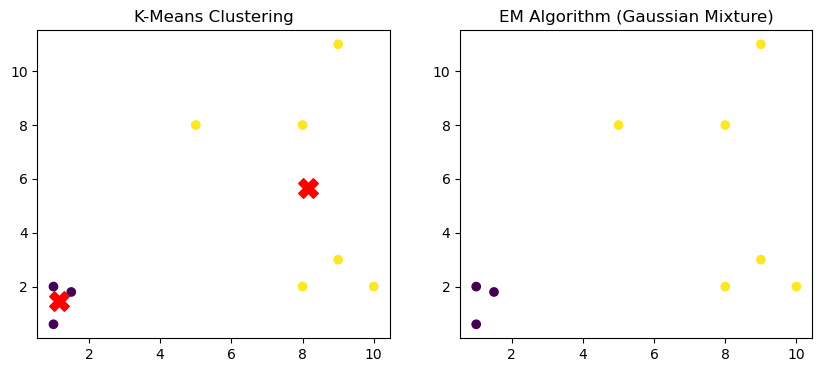

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('ml9.csv')
print("Data:\n", data.head())

# Convert to array
X = data.values

# Choose number of clusters (you can change this)
k = 2

# ---------- K-MEANS ----------
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# ---------- EM ALGORITHM (Gaussian Mixture) ----------
em = GaussianMixture(n_components=k, random_state=0)
em_labels = em.fit_predict(X)

# ---------- Evaluation ----------
kmeans_score = silhouette_score(X, kmeans_labels)
em_score = silhouette_score(X, em_labels)

print("\nSilhouette Score (K-Means):", round(kmeans_score, 3))
print("Silhouette Score (EM - GMM):", round(em_score, 3))

# ---------- Visualization ----------
plt.figure(figsize=(10, 4))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")

# EM (GMM) plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=em_labels, cmap='viridis')
plt.title("EM Algorithm (Gaussian Mixture)")

plt.show()






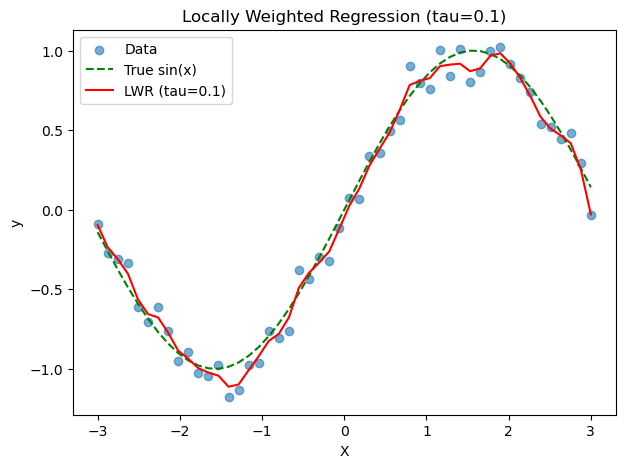

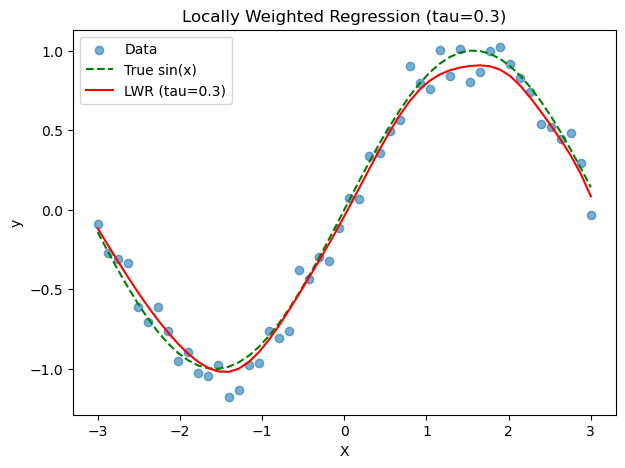

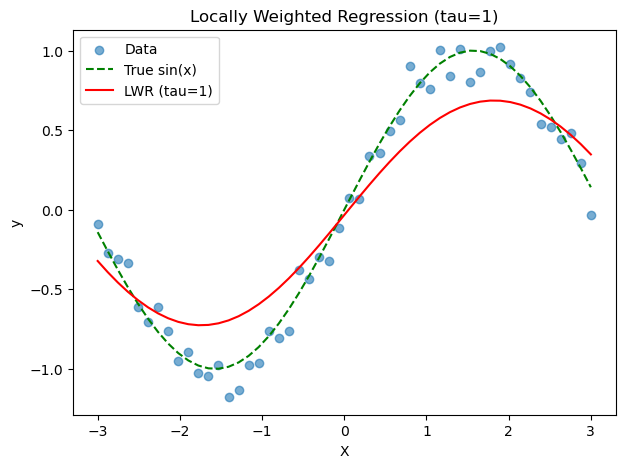

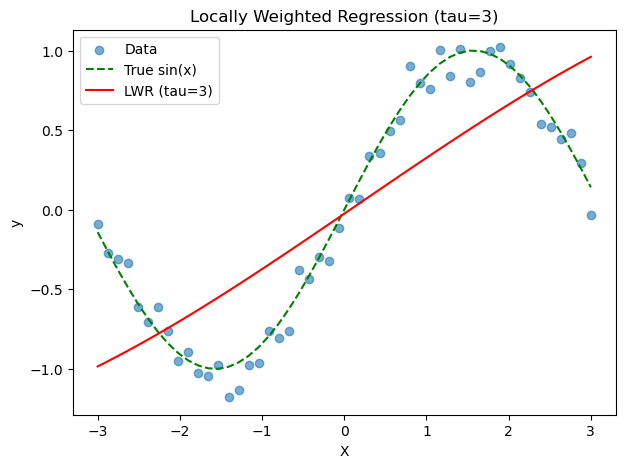

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Create dataset
# --------------------------
np.random.seed(42)
X = np.linspace(-3, 3, 50).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# --------------------------
# Step 2: LWR function
# --------------------------
def lw_regression(X, y, tau):
    y_pred = []
    X_bias = np.hstack((np.ones_like(X), X))  # Add bias term
    for x in X:
        w = np.exp(-np.sum((X - x)**2, axis=1) / (2 * tau**2))
        W = np.diag(w)
        theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ (X_bias.T @ W @ y)
        y_pred.append(np.array([1, x.item()]) @ theta)
    return np.array(y_pred)

# --------------------------
# Step 3: Plot results
# --------------------------
for tau in [0.1, 0.3, 1, 3]:
    y_pred = lw_regression(X, y, tau)
    plt.figure(figsize=(7, 5))
    plt.scatter(X, y, label='Data', alpha=0.6)
    plt.plot(X, np.sin(X), 'g--', label='True sin(x)')
    plt.plot(X, y_pred, 'r', label=f'LWR (tau={tau})')
    plt.title(f'Locally Weighted Regression (tau={tau})')
    plt.xlabel('X'); plt.ylabel('y')
    plt.legend(); plt.show()
